<h1><center>Titanic Survival Prediction

## Problem Statement:


## Hypothesis:
1. Children, women and the elderly are more likely to survive than other male adults.
2. Persons who paid higher fares are more likely to survive.
3. Persons in a higher class are more likely to survive than those in lower class.

In [1]:
#Libraries
import numpy as np #For arrays and mathematical computations
import pandas as pd # For the dataframe management and manipulation
import sklearn as sk # For utilizating machine learning algorithms
import seaborn as sb # for creating beautiful plots
%matplotlib inline 

## Data Acquisition

Load data into a DataFrame from local machine or from the internet url

In [2]:
#Read Data from File
location = r"C:\Users\Latoya Clarke\Documents\Python Scripts\train.csv"
titanic = pd.read_csv(location)
titanic.head()

#Cabin field showing missing values
#Several numeric fields such as Survived and Pclass are categorical fields

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##  Data Exploration

### Variable Identification

Target Variable: **Survived** 

Predictor Variable: **Pclass, Sex, Age, Fare**

### Univariate Analysis

In [3]:
titanic.info()

#Age, Cabin, embarked have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 12 columns):
PassengerId    691 non-null int64
Survived       691 non-null int64
Pclass         691 non-null int64
Name           691 non-null object
Sex            691 non-null object
Age            548 non-null float64
SibSp          691 non-null int64
Parch          691 non-null int64
Ticket         691 non-null object
Fare           691 non-null float64
Cabin          155 non-null object
Embarked       690 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 64.9+ KB


In [4]:
titanic.describe()

#Ignore PassengerID as it is categorical
#Parent/Children field goes up to 6
#Sibling/Spouse fiels goes up to 8
#The lowest fare is $0 and the highest is %512.39
#75% of the persons on the titanic are 38 or younger

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,691.000000,691.000000,691.000000,548.000000,691.000000,691.000000,691.000000
mean,346.000000,0.387844,2.308249,29.921989,0.538350,0.387844,32.276103
std,199.618803,0.487612,0.835224,14.598391,1.076585,0.821855,48.447543
min,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,173.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,346.000000,0.000000,3.000000,28.000000,0.000000,0.000000,15.000000
75%,518.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,691.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.corr()

#Survived seem to correlate positively strong with Parch and weaker with Fare.
#Survived also seem to correlate negatively strong with Age and weakly with Pclass
#The Number of Parents/Children (Parch) will also be considered for the analysis 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.012284,-0.064985,0.100810,-0.074127,0.003507,0.037857
Survived,0.012284,1.000000,-0.318885,-0.077312,-0.033896,0.061689,0.229339
Pclass,-0.064985,-0.318885,1.000000,-0.373770,0.090793,0.013490,-0.568966
Age,0.100810,-0.077312,-0.373770,1.000000,-0.331680,-0.206289,0.085428
SibSp,-0.074127,-0.033896,0.090793,-0.331680,1.000000,0.402487,0.160064
Parch,0.003507,0.061689,0.013490,-0.206289,0.402487,1.000000,0.230892
Fare,0.037857,0.229339,-0.568966,0.085428,0.160064,0.230892,1.000000


In [6]:
#Filter categorical variables
categorical_columns = [x for x in titanic.dtypes.index if titanic.dtypes[x]=='object']

#Exclude ID and irrelevant columns:
categorical_columns = [x for x in categorical_columns if x not in ['PassengerId', 'Cabin','Name', 'Ticket']]

#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories: %s'%col)
    print(titanic[col].value_counts())


Frequency of Categories: Sex
male      442
female    249
Name: Sex, dtype: int64

Frequency of Categories: Embarked
S    497
C    131
Q     62
Name: Embarked, dtype: int64


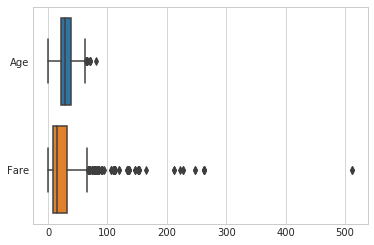

In [7]:
titan = titanic.drop(['PassengerId','Survived', 'Pclass', 'Parch', 'SibSp'], axis =1)
with sb.axes_style('whitegrid'):
    sb.boxplot(data=titan, orient="h");
    

In [8]:
titanic.Pclass.unique()

array([3, 1, 2], dtype=int64)

### Bivariate Analysis

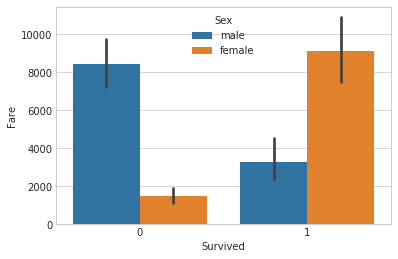

In [9]:
# Showing total Fares
with sb.axes_style('whitegrid'):
    sb.barplot(data=titanic, y = 'Fare', x ='Survived', hue='Sex', estimator = np.sum)

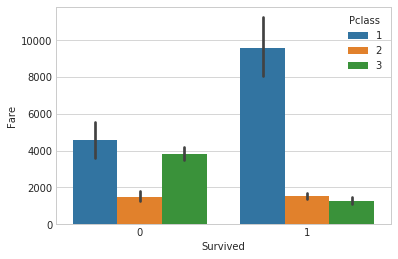

In [10]:
# Showing total Fares
with sb.axes_style('whitegrid'):
    sb.barplot(data=titanic, y = 'Fare', x ='Survived', hue='Pclass', estimator = np.sum)

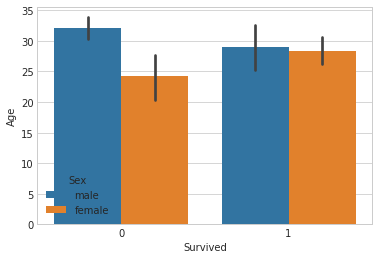

In [11]:
# Showing average ages by sex
with sb.axes_style('whitegrid'):
    sb.barplot(data=titanic, y = 'Age', x ='Survived', hue='Sex', estimator = np.mean)

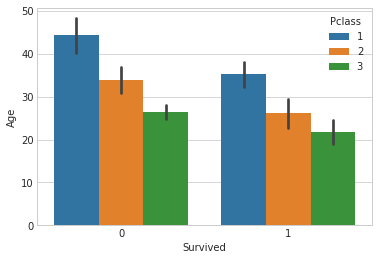

In [12]:
# Showing average ages by sex
with sb.axes_style('whitegrid'):
    sb.barplot(data=titanic, y = 'Age', x ='Survived', hue='Pclass', estimator = np.mean)
    


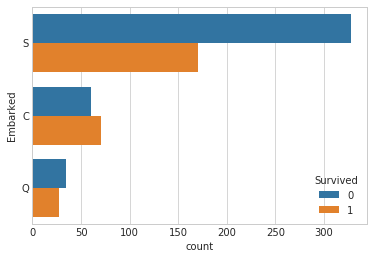

In [29]:
# Showing total servived ages by Embarked
with sb.axes_style('whitegrid'):
    sb.countplot(data=titanic, y = 'Embarked', hue ='Survived')


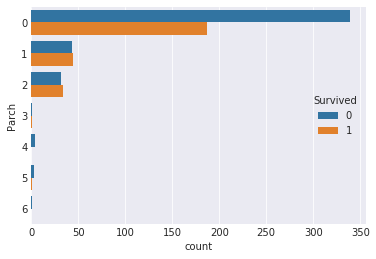

In [28]:
# Showing the number of Parch by Survival
with sb.axes_style('darkgrid'):
    sb.countplot(data=titanic, y = 'Parch', hue ='Survived')

#People are more likely to survive if they have 0-3 Parent/Children onboard

### Missing Value Treatment

In [14]:
titanic['Age']= titanic['Age'].fillna(int(titanic['Age'].mean()))
titanic.Age.isnull().any()

False

In [15]:
titanic['Embarked'].mode()

0    S
dtype: object

In [16]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.Embarked.isnull().any()

False

### Outlier Detection and Treatment

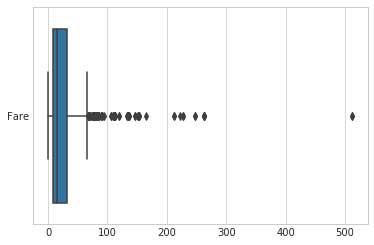

In [17]:
titan = titanic.drop(['PassengerId','Survived', 'Pclass', 'Parch', 'SibSp', 'Age'], axis =1)
with sb.axes_style('whitegrid'):
    sb.boxplot(data=titan, orient="h");

## Model Building

In [18]:
#Creating labels for the dataset
y = np.array(titanic.Survived)

In [19]:
#Creating features for training
titanic_selected = titanic.drop(['PassengerId','Survived','Cabin', 'Ticket', 'SibSp'], axis = 1)
X= titanic_selected.to_dict(orient='records')

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
X = vec.fit_transform(X).toarray()

In [20]:
#Splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [21]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier()

# Train the model using the training sets and check score
model.fit(X_train, y_train)

#Predict Output
predicted= model.predict(X_test)

In [22]:
# Showing accuracy of prediction 
from sklearn.metrics import accuracy_score
print("Accuracy: ", round(100* accuracy_score(predicted, y_test),2),"%")

Accuracy:  86.33 %


<center>Shamar Morgan (B.Eng)<center>
<center>Electrical Engineering<center>
<center>*Data Scientist*<center>